# Global Cancer Paitients

This dataset contains global cancer patient data reported from 2015 to 2024, designed to simulate the key factors influencing cancer diagnosis, treatment, and survival. It includes a variety of features that are commonly studied in the medical field, such as age, gender, cancer type, environmental factors, and lifestyle behaviors. The dataset is perfect for:



Key Features:
Age: Patient's age (20-90 years)

Gender: Male, Female, or Other

Country/Region: Country or region of the patient

Cancer Type: Various types of cancer (e.g., Breast, Lung, Colon)

Cancer Stage: Stage 0 to Stage IV

Risk Factors: Includes genetic risk, air pollution, alcohol use, smoking, obesity, etc.

Treatment Cost: Estimated cost of cancer treatment (in USD)

Survival Years: Years survived since diagnosis

Severity Score: A composite score representing cancer severity



## Dataset & Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv(r'Global Cancer Patients.csv')


## Explore Dataset

In [3]:
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           49176 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            43186 non-null  float64
 8   Smoking                47954 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         46919 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

### Choose Stratified Sample For Dataset

In [5]:
fraction = 0.5
df = df.groupby(['Cancer_Type','Year','Country_Region','Gender','Cancer_Stage'], 
                               group_keys=False).apply(lambda x: x.sample(frac=fraction, random_state=42))


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,25063.0,54.396162,20.242630,20.00,37.00,54.00,72.000,89.00
Year,25063.0,2019.477916,2.873643,2015.00,2017.00,2019.00,2022.000,2024.00
Genetic_Risk,24637.0,5.005938,2.875500,0.00,2.50,5.00,7.500,10.00
Air_Pollution,25063.0,5.019148,2.890570,0.00,2.50,5.00,7.500,10.00
Alcohol_Use,21099.0,5.023063,2.880806,0.00,2.50,5.10,7.500,10.00
Smoking,23800.0,4.979794,2.880242,0.00,2.50,4.90,7.500,10.00
Obesity_Level,25063.0,4.994179,2.889286,0.00,2.50,5.00,7.500,10.00
Treatment_Cost_USD,25063.0,52443.378568,27353.917851,5000.05,28585.98,52611.03,76129.770,99999.84
Survival_Years,23407.0,4.986312,2.876484,0.00,2.50,5.00,7.500,10.00
Target_Severity_Score,25063.0,4.952149,1.198290,0.90,4.13,4.96,5.785,8.86


In [7]:
df

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
14540,PT0014540,25,Female,Australia,2015,7.1,8.5,7.8,4.5,2.2,Breast,Stage 0,55659.23,1.6,5.87
35970,PT0035970,36,Female,Australia,2015,10.0,9.7,8.4,1.1,2.2,Breast,Stage 0,71372.99,8.6,5.73
12350,PT0012350,49,Female,Australia,2015,9.9,5.3,5.7,9.7,5.3,Breast,Stage I,76981.61,NaN,6.56
35216,PT0035216,69,Female,Australia,2015,5.6,2.0,9.6,1.2,2.3,Breast,Stage I,57893.61,1.1,4.17
2416,PT0002416,58,Female,Australia,2015,4.2,4.7,6.5,7.3,8.3,Breast,Stage I,63010.13,5.7,5.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39728,PT0039728,68,Other,USA,2024,5.6,6.1,3.3,9.5,7.4,Skin,Stage II,27146.04,2.3,6.63
8804,PT0008804,29,Other,USA,2024,5.9,8.7,9.6,7.3,0.1,Skin,Stage III,40194.95,4.2,6.59
23055,PT0023055,24,Other,USA,2024,5.3,8.3,3.5,6.3,1.3,Skin,Stage III,68546.78,4.8,4.85
19713,PT0019713,30,Other,USA,2024,6.9,0.9,6.9,8.5,0.8,Skin,Stage IV,25099.78,4.6,5.83


## (Data Cleaning & Analaysis)

### Drop Duplicates

In [8]:
df =df.drop_duplicates()

### Handle Missing Values

In [9]:
df.isnull().sum()

Patient_ID                  0
Age                         0
Gender                      0
Country_Region              0
Year                        0
Genetic_Risk              426
Air_Pollution               0
Alcohol_Use              3964
Smoking                  1263
Obesity_Level               0
Cancer_Type                 0
Cancer_Stage                0
Treatment_Cost_USD          0
Survival_Years           1656
Target_Severity_Score       0
dtype: int64

In [10]:
#percentage for missing values
percentage = (df.isnull().sum()/len(df))*100
print(percentage)

Patient_ID                0.000000
Age                       0.000000
Gender                    0.000000
Country_Region            0.000000
Year                      0.000000
Genetic_Risk              1.699717
Air_Pollution             0.000000
Alcohol_Use              15.816143
Smoking                   5.039301
Obesity_Level             0.000000
Cancer_Type               0.000000
Cancer_Stage              0.000000
Treatment_Cost_USD        0.000000
Survival_Years            6.607349
Target_Severity_Score     0.000000
dtype: float64


In [11]:
print(percentage[percentage > 0])

Genetic_Risk       1.699717
Alcohol_Use       15.816143
Smoking            5.039301
Survival_Years     6.607349
dtype: float64


Now We Have Four Tables Has Missing Values ,

#### Handle Genetic_Risk Column

In [12]:
#remove missing values in Genetic_Risk
df = df.dropna(subset=['Genetic_Risk'])

#### Handle Smoking Column

In [13]:
#replace missing values using knn
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Smoking'] = imputer.fit_transform(pd.DataFrame(df['Smoking']))

#### Handle Survival_Years Column

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Survival_Years'] = imputer.fit_transform(pd.DataFrame(df['Survival_Years']))

#### Handle Alcohol_Use Column

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['Alcohol_Use'] = imputer.fit_transform(df[['Alcohol_Use']])

### Check For Outlier

Age                         Axes(0.125,0.53;0.133621x0.35)
Year                     Axes(0.285345,0.53;0.133621x0.35)
Genetic_Risk              Axes(0.44569,0.53;0.133621x0.35)
Air_Pollution            Axes(0.606034,0.53;0.133621x0.35)
Alcohol_Use              Axes(0.766379,0.53;0.133621x0.35)
Smoking                     Axes(0.125,0.11;0.133621x0.35)
Obesity_Level            Axes(0.285345,0.11;0.133621x0.35)
Treatment_Cost_USD        Axes(0.44569,0.11;0.133621x0.35)
Survival_Years           Axes(0.606034,0.11;0.133621x0.35)
Target_Severity_Score    Axes(0.766379,0.11;0.133621x0.35)
dtype: object

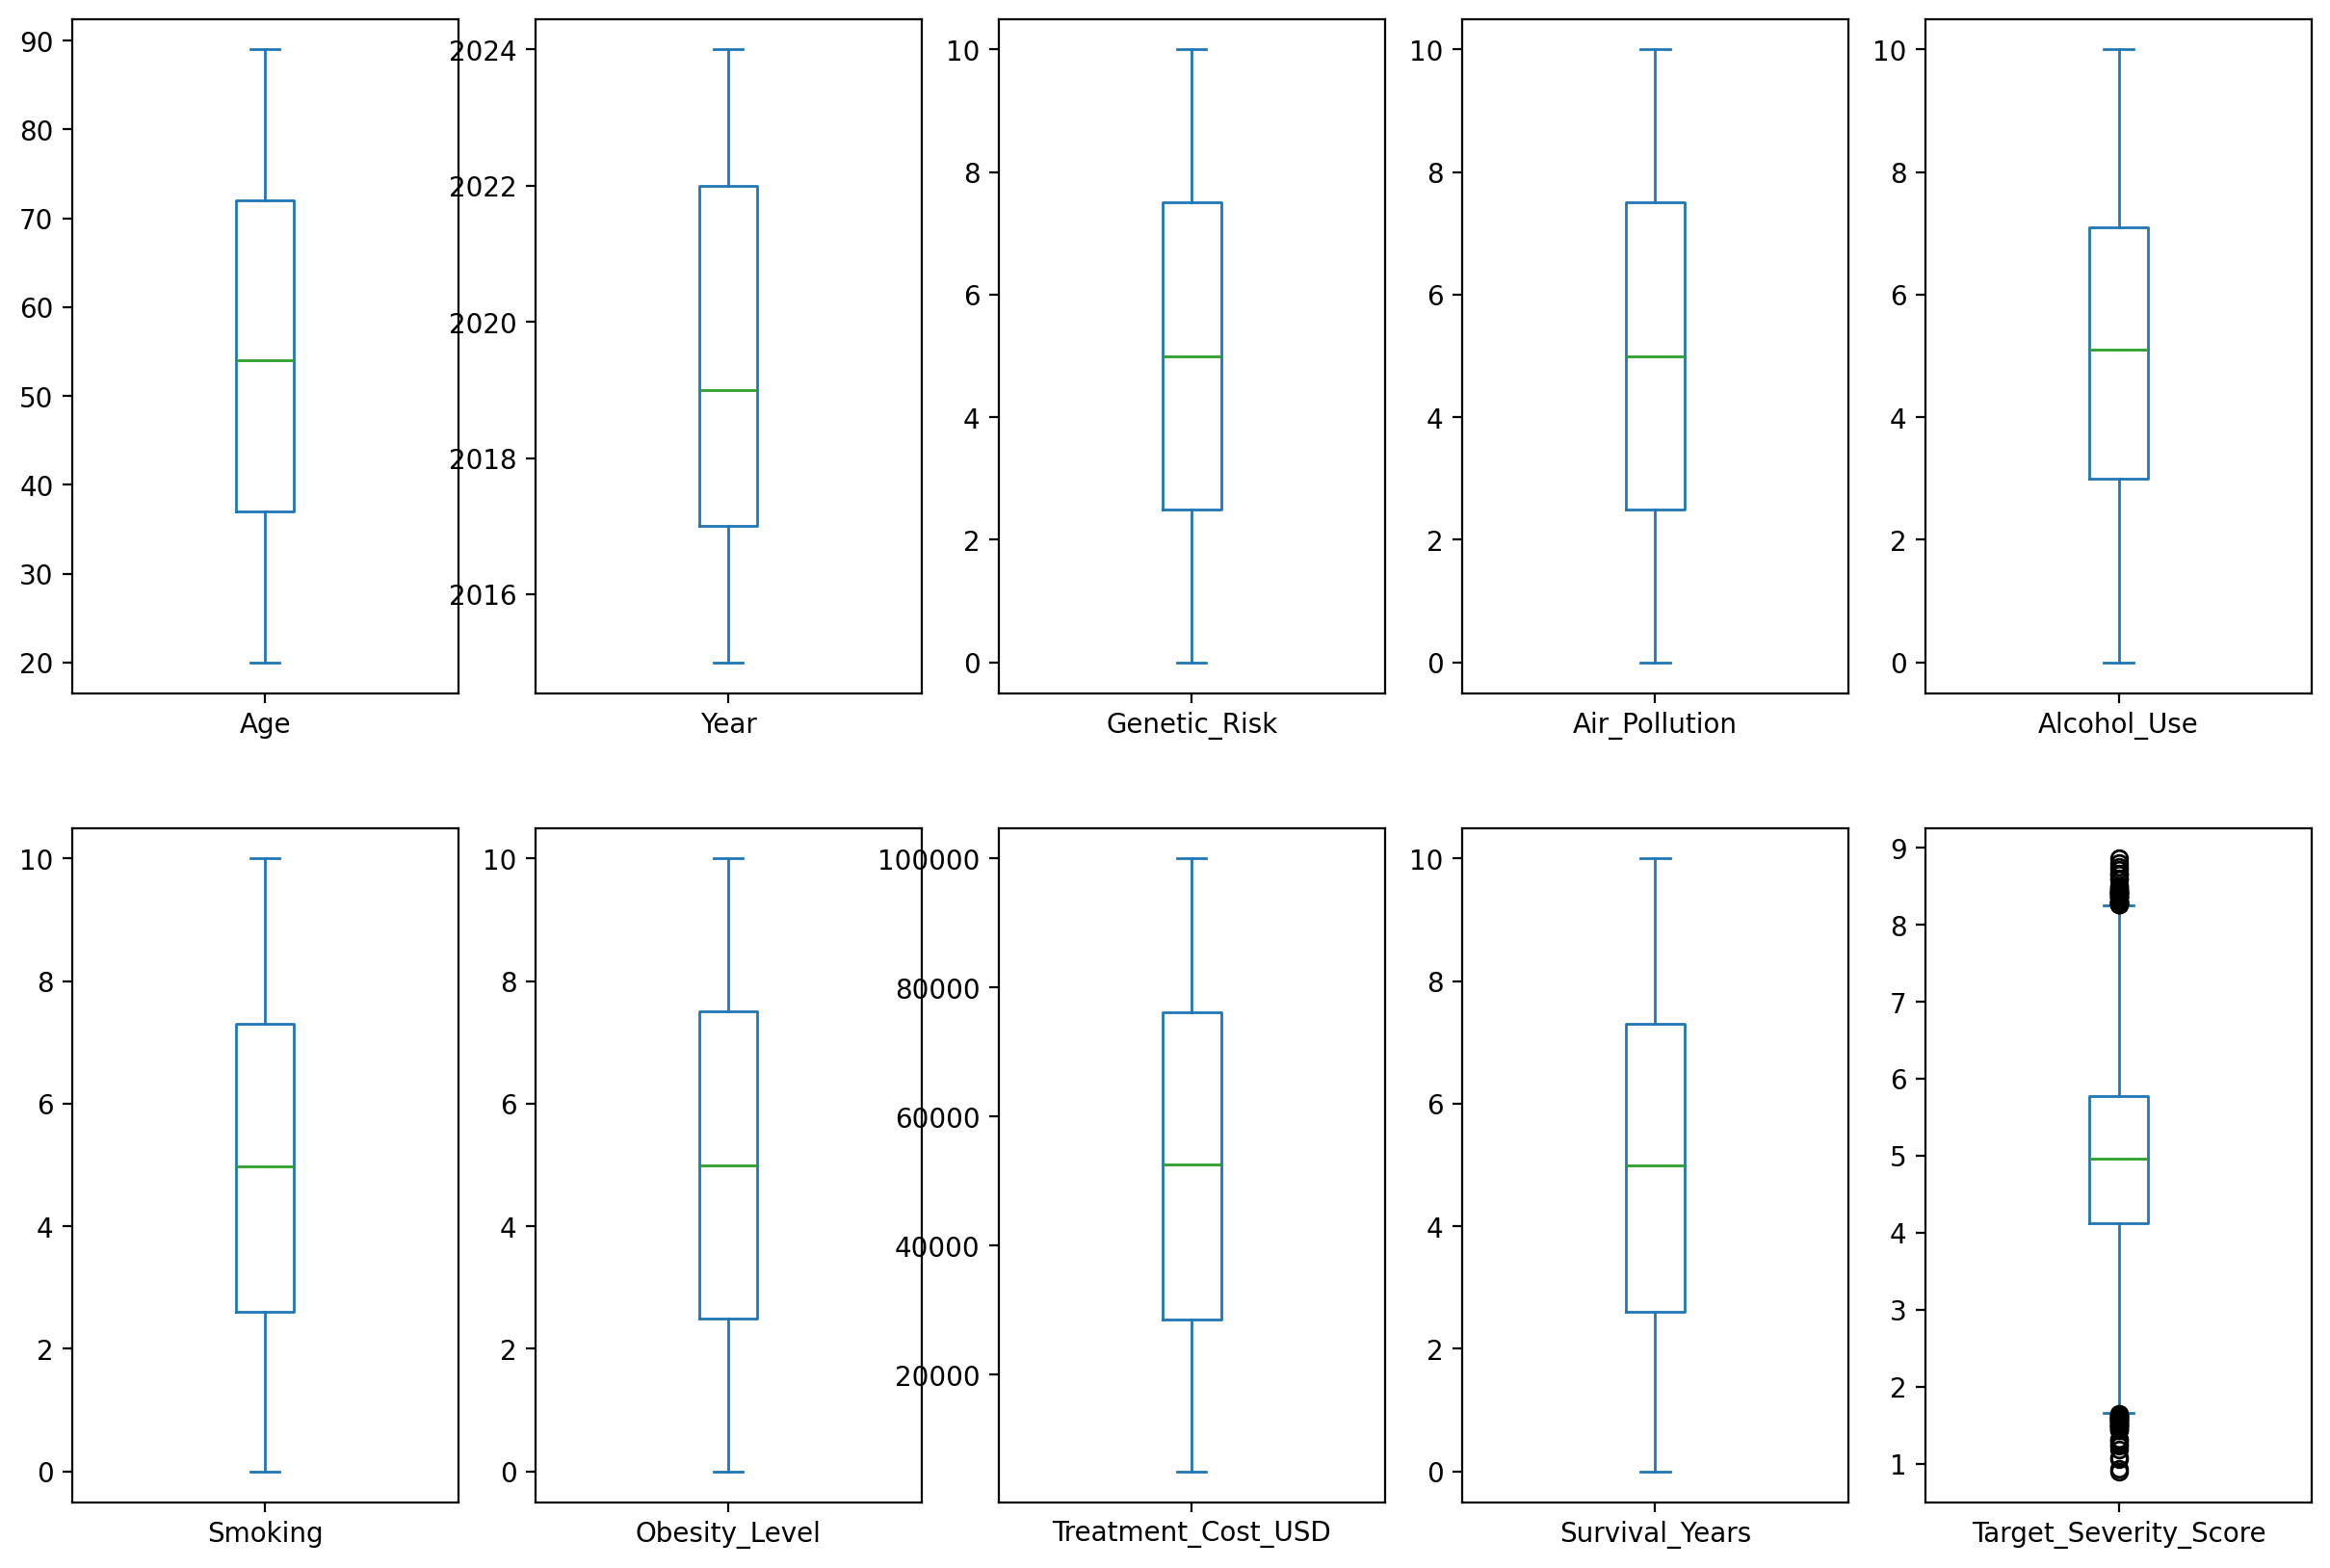

In [16]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(15,10))

Now We Notice That all Features Has No Outliers but the target has outlier

#### Handle Outliers in Target

by using IQR To Remove Outliers

In [17]:
Q1 = df['Target_Severity_Score'].quantile(0.25)
Q3 =df['Target_Severity_Score'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df = df[
    (df['Target_Severity_Score'] >= (Q1 - 1.5 * IQR)) &
    (df['Target_Severity_Score'] <= (Q3 + 1.5 * IQR))
]


1.6500000000000004


Age                         Axes(0.125,0.53;0.133621x0.35)
Year                     Axes(0.285345,0.53;0.133621x0.35)
Genetic_Risk              Axes(0.44569,0.53;0.133621x0.35)
Air_Pollution            Axes(0.606034,0.53;0.133621x0.35)
Alcohol_Use              Axes(0.766379,0.53;0.133621x0.35)
Smoking                     Axes(0.125,0.11;0.133621x0.35)
Obesity_Level            Axes(0.285345,0.11;0.133621x0.35)
Treatment_Cost_USD        Axes(0.44569,0.11;0.133621x0.35)
Survival_Years           Axes(0.606034,0.11;0.133621x0.35)
Target_Severity_Score    Axes(0.766379,0.11;0.133621x0.35)
dtype: object

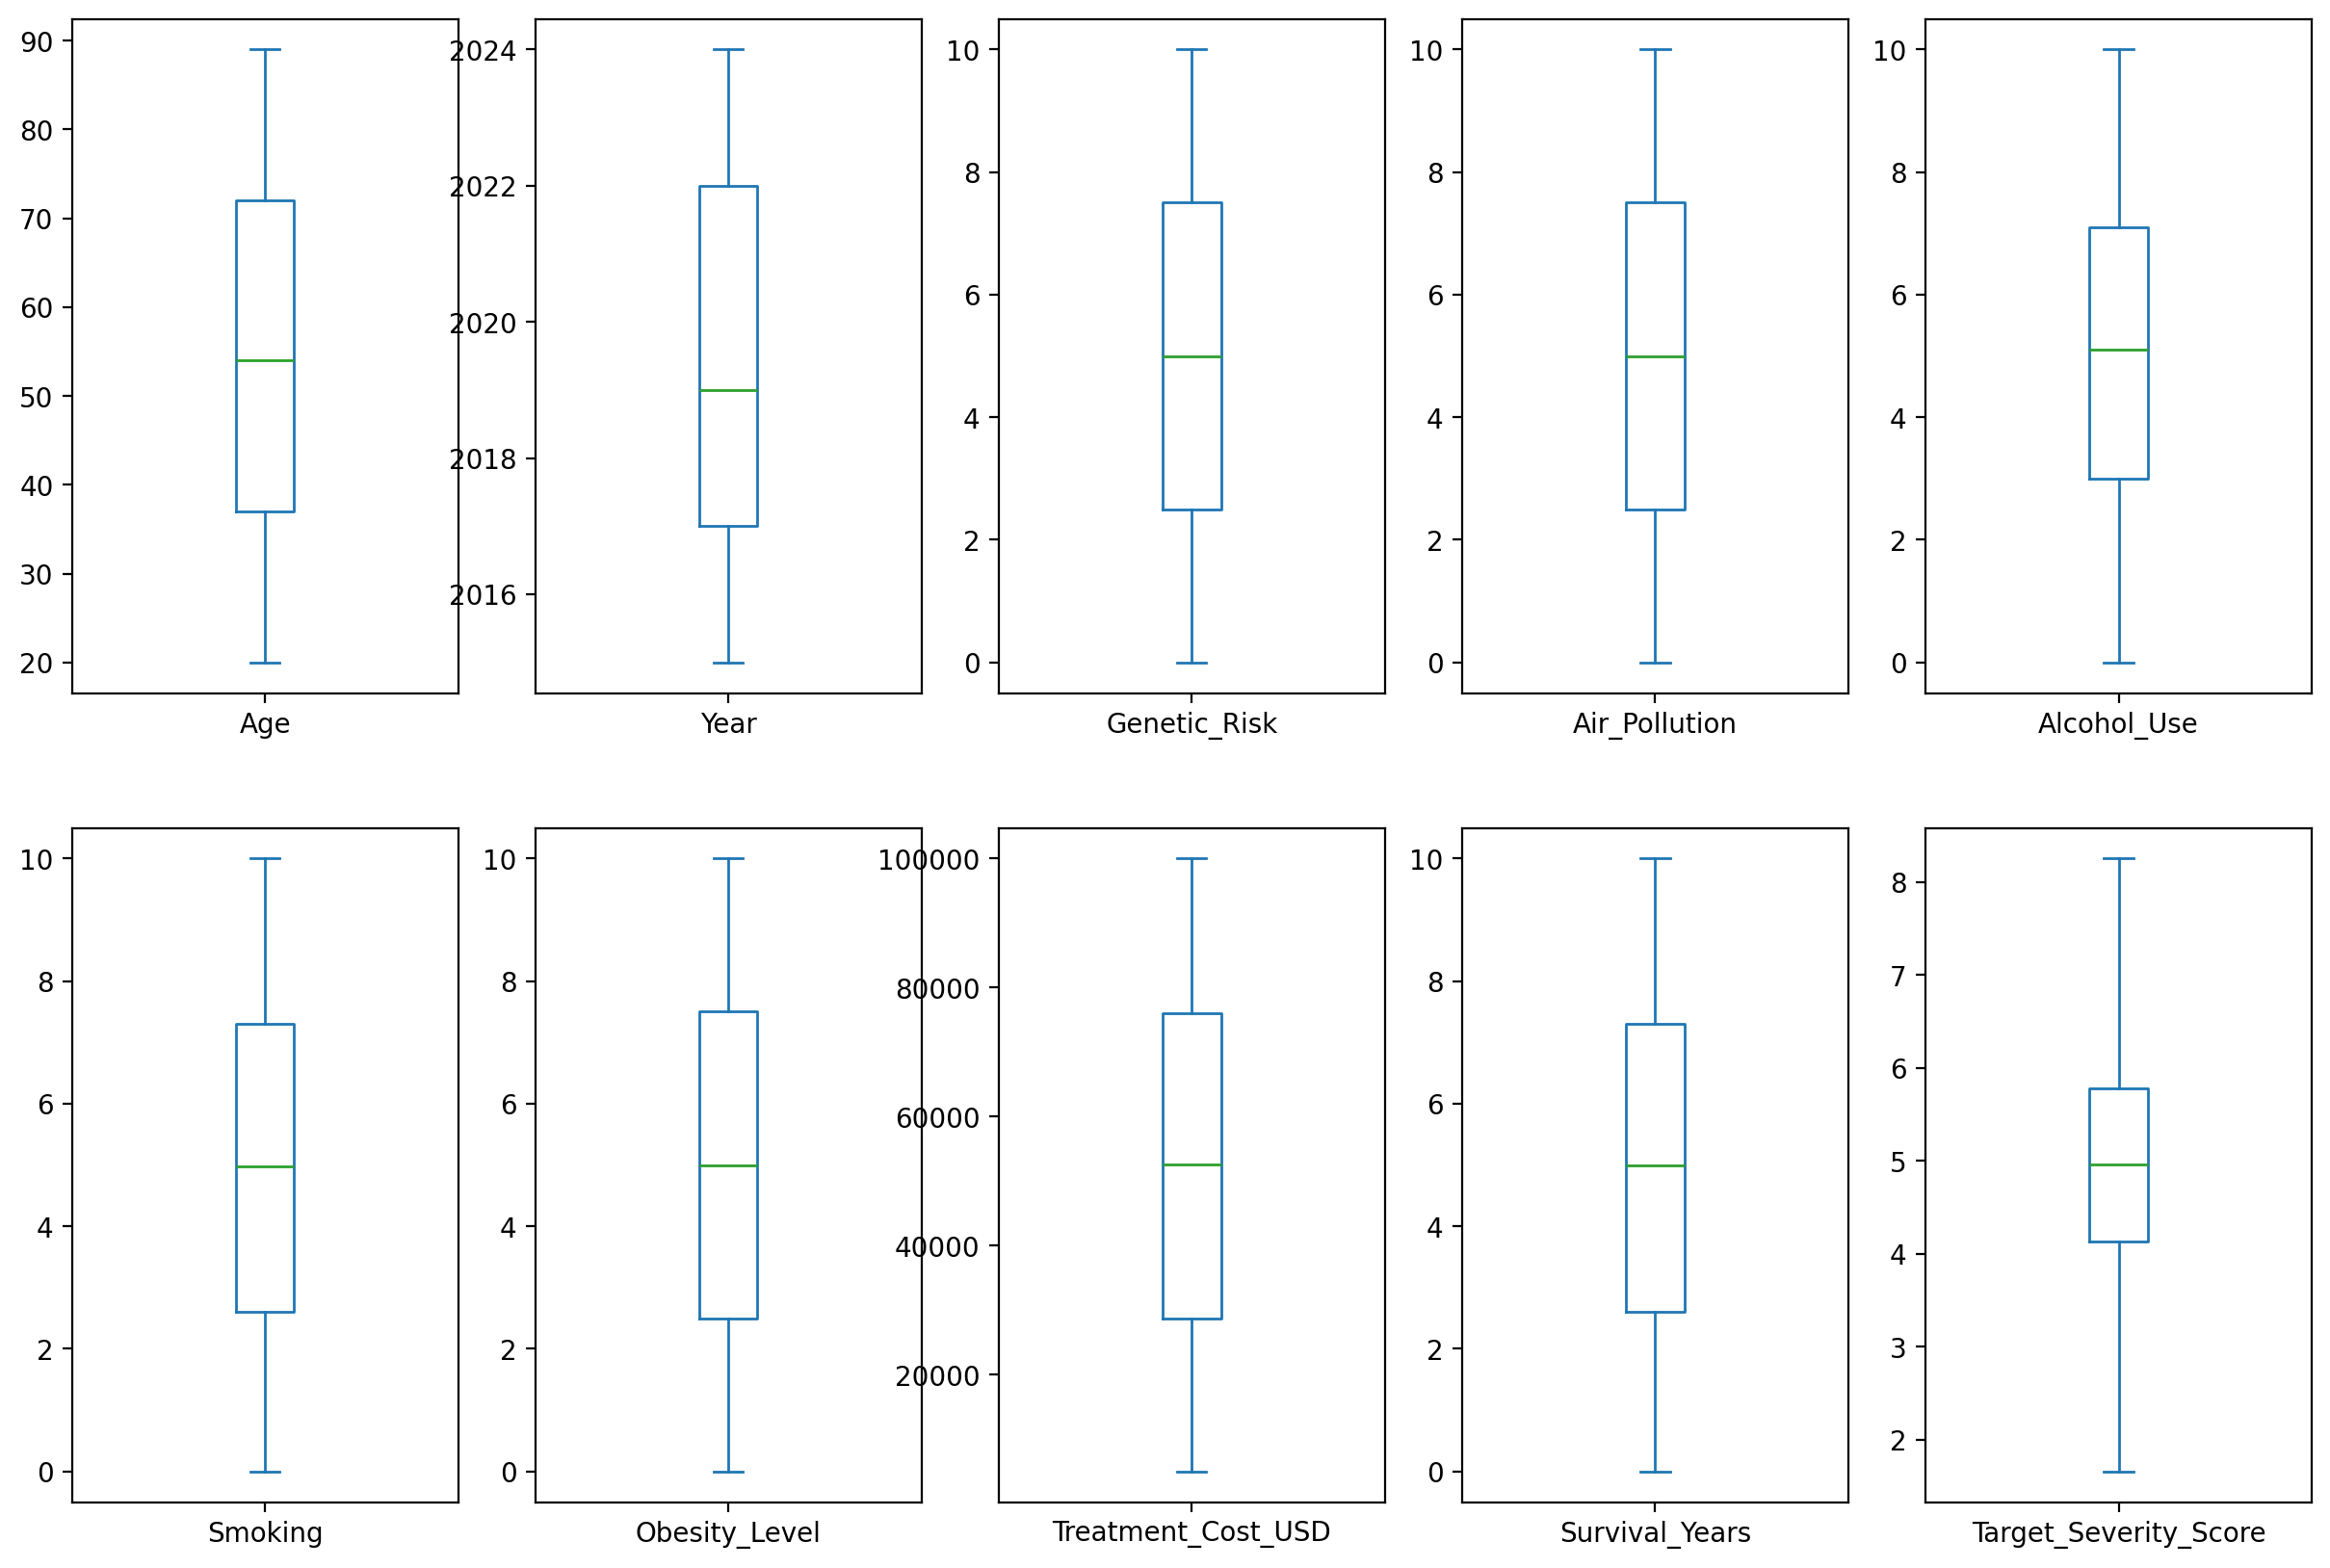

In [18]:
df.plot(kind='box', subplots=True,layout=(2,5),figsize=(15,10))

### Visualizations & Insights

#### correlation matrix

<Axes: >

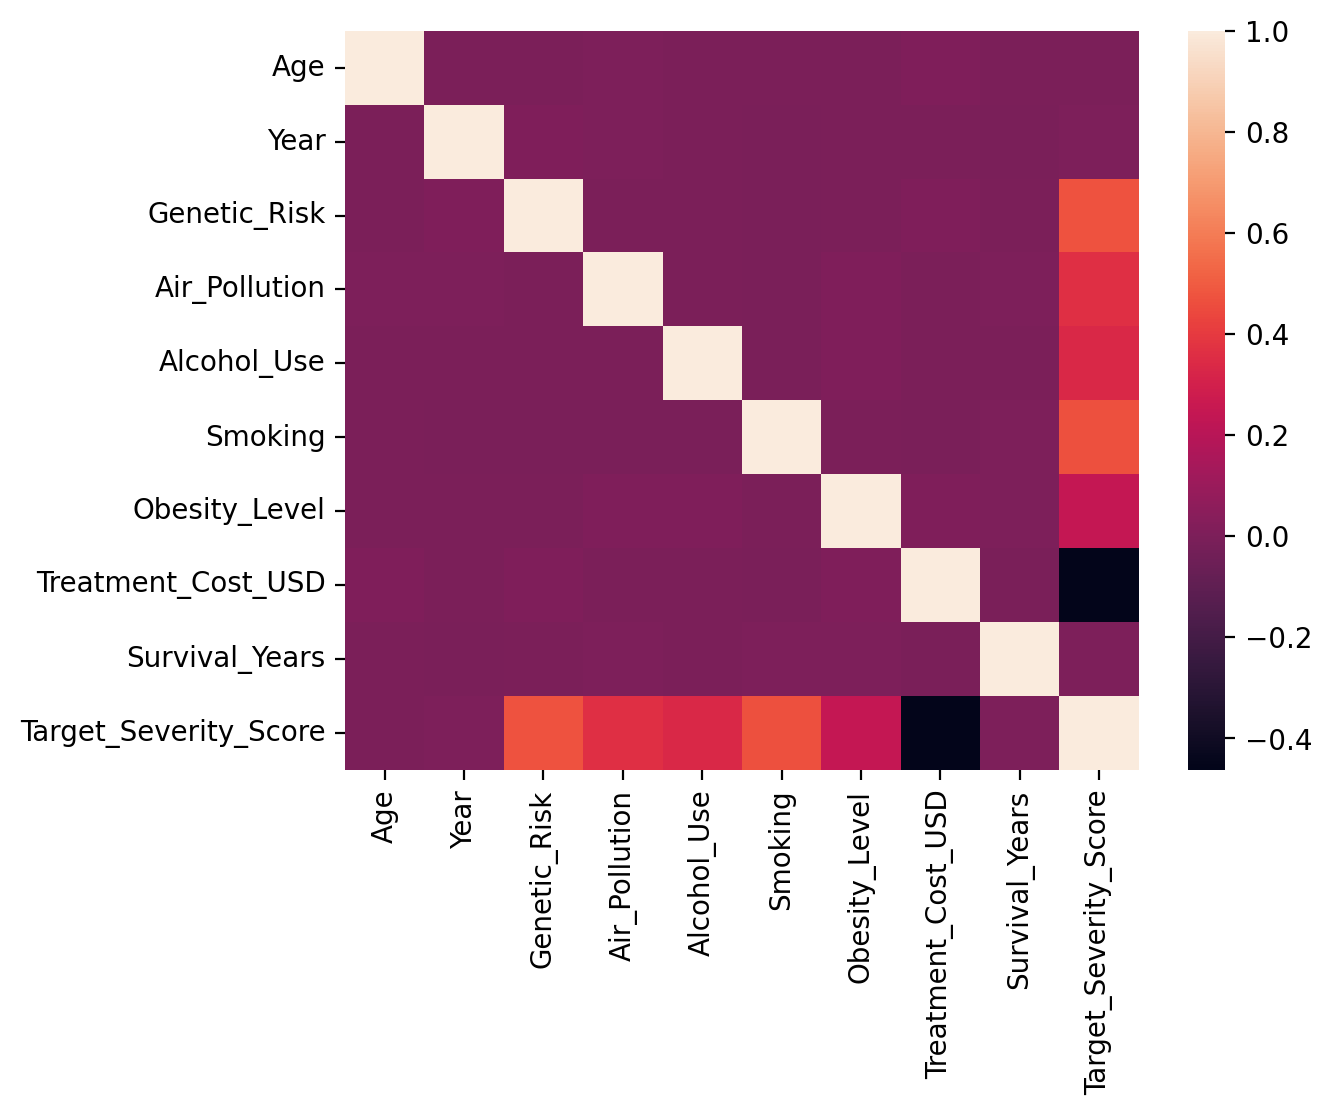

In [19]:
corr =df.select_dtypes(include=np.number).corr()
sns.heatmap(corr)

#### Target Distribution

<Axes: xlabel='Target_Severity_Score', ylabel='Count'>

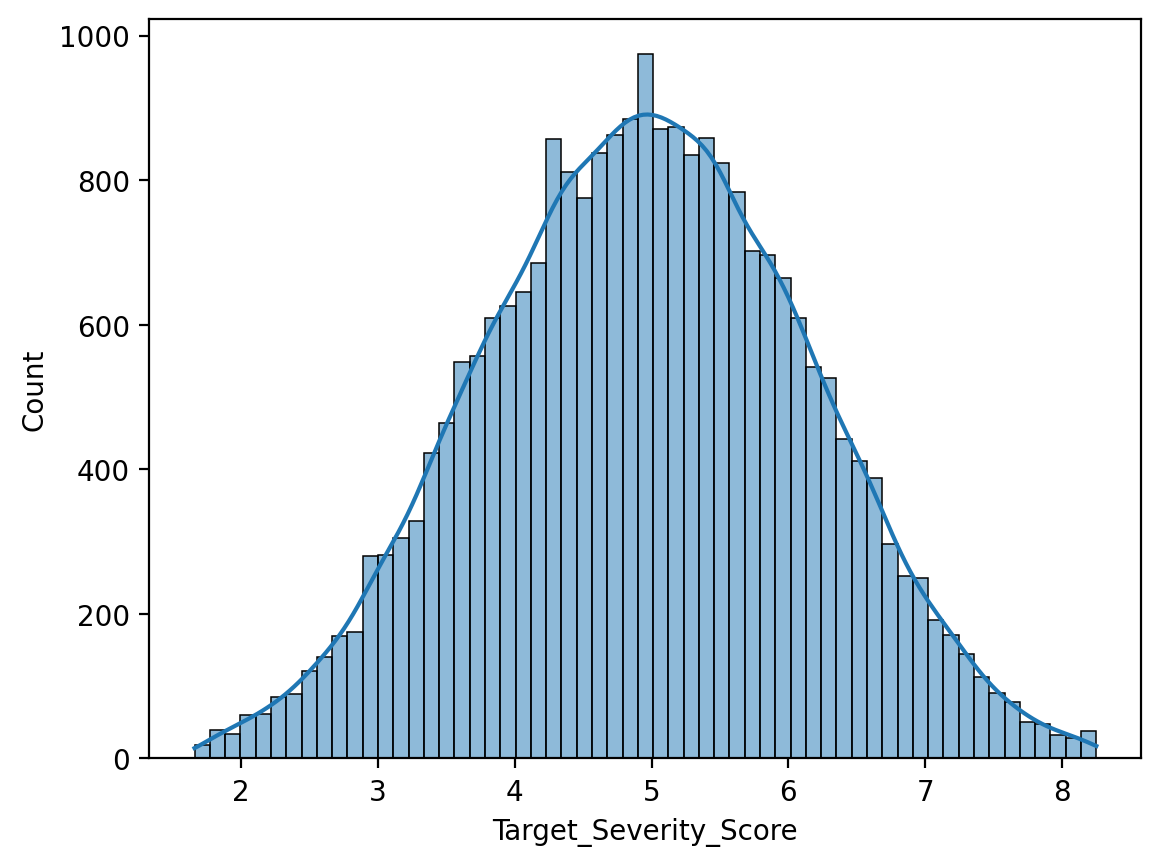

In [20]:
sns.histplot(df['Target_Severity_Score'],kde =True)

#### Cancer Stage & Cancer Type Count

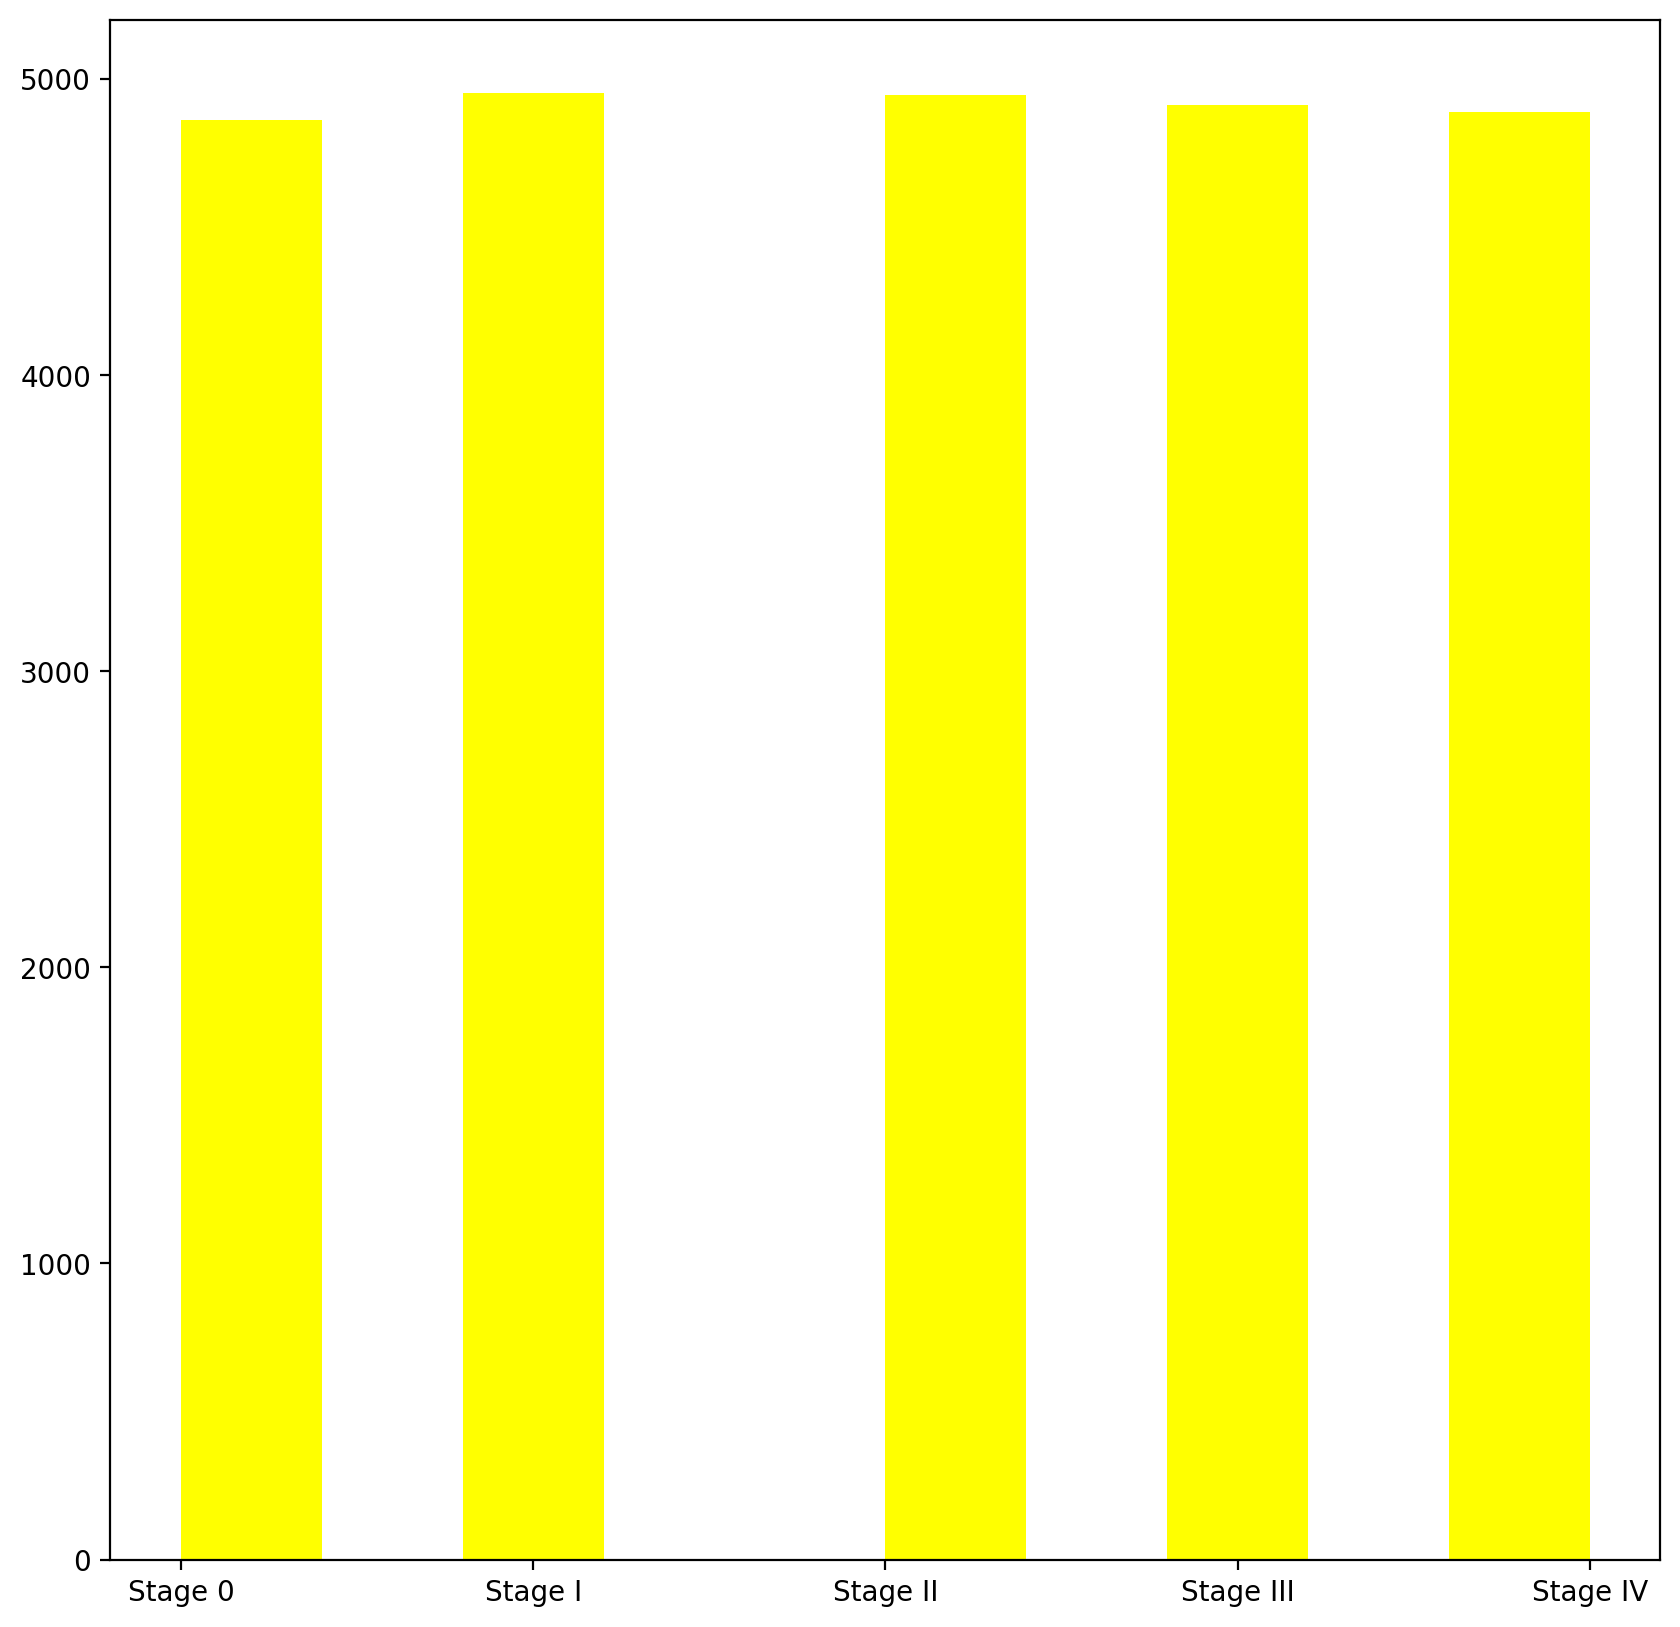

In [21]:
plt.figure(figsize=(10,10))

plt.hist(df['Cancer_Stage'],bins=10,color='yellow')
plt.show()

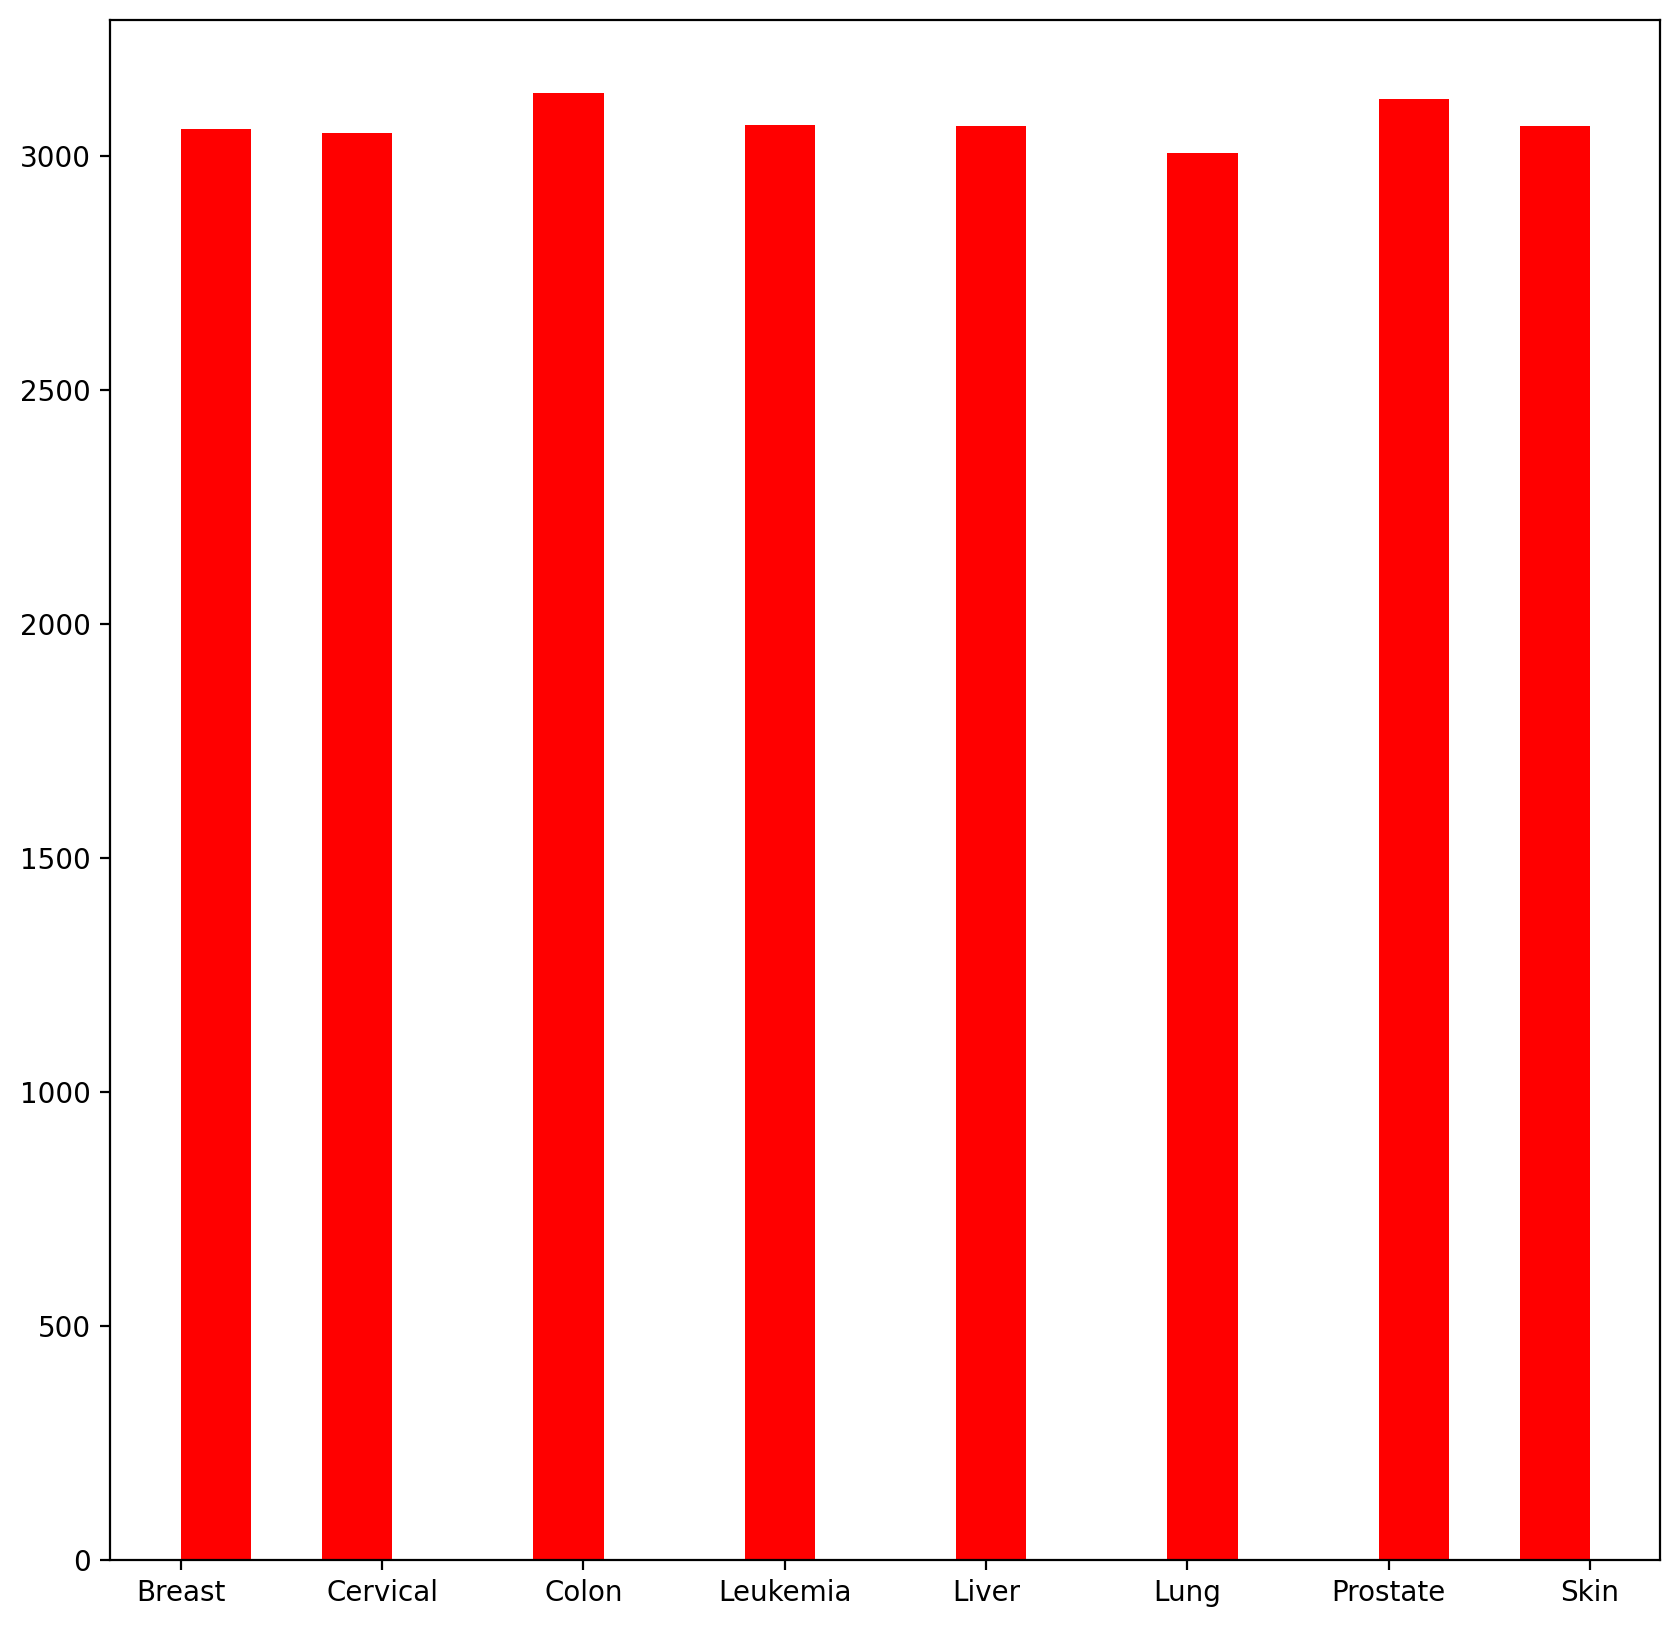

In [22]:
plt.figure(figsize=(10,10))
plt.hist(df['Cancer_Type'],bins=20,color='red')
plt.show()

#### Pie Chart

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24560 entries, 14540 to 46369
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             24560 non-null  object 
 1   Age                    24560 non-null  int64  
 2   Gender                 24560 non-null  object 
 3   Country_Region         24560 non-null  object 
 4   Year                   24560 non-null  int64  
 5   Genetic_Risk           24560 non-null  float64
 6   Air_Pollution          24560 non-null  float64
 7   Alcohol_Use            24560 non-null  float64
 8   Smoking                24560 non-null  float64
 9   Obesity_Level          24560 non-null  float64
 10  Cancer_Type            24560 non-null  object 
 11  Cancer_Stage           24560 non-null  object 
 12  Treatment_Cost_USD     24560 non-null  float64
 13  Survival_Years         24560 non-null  float64
 14  Target_Severity_Score  24560 non-null  float64
dtypes: 

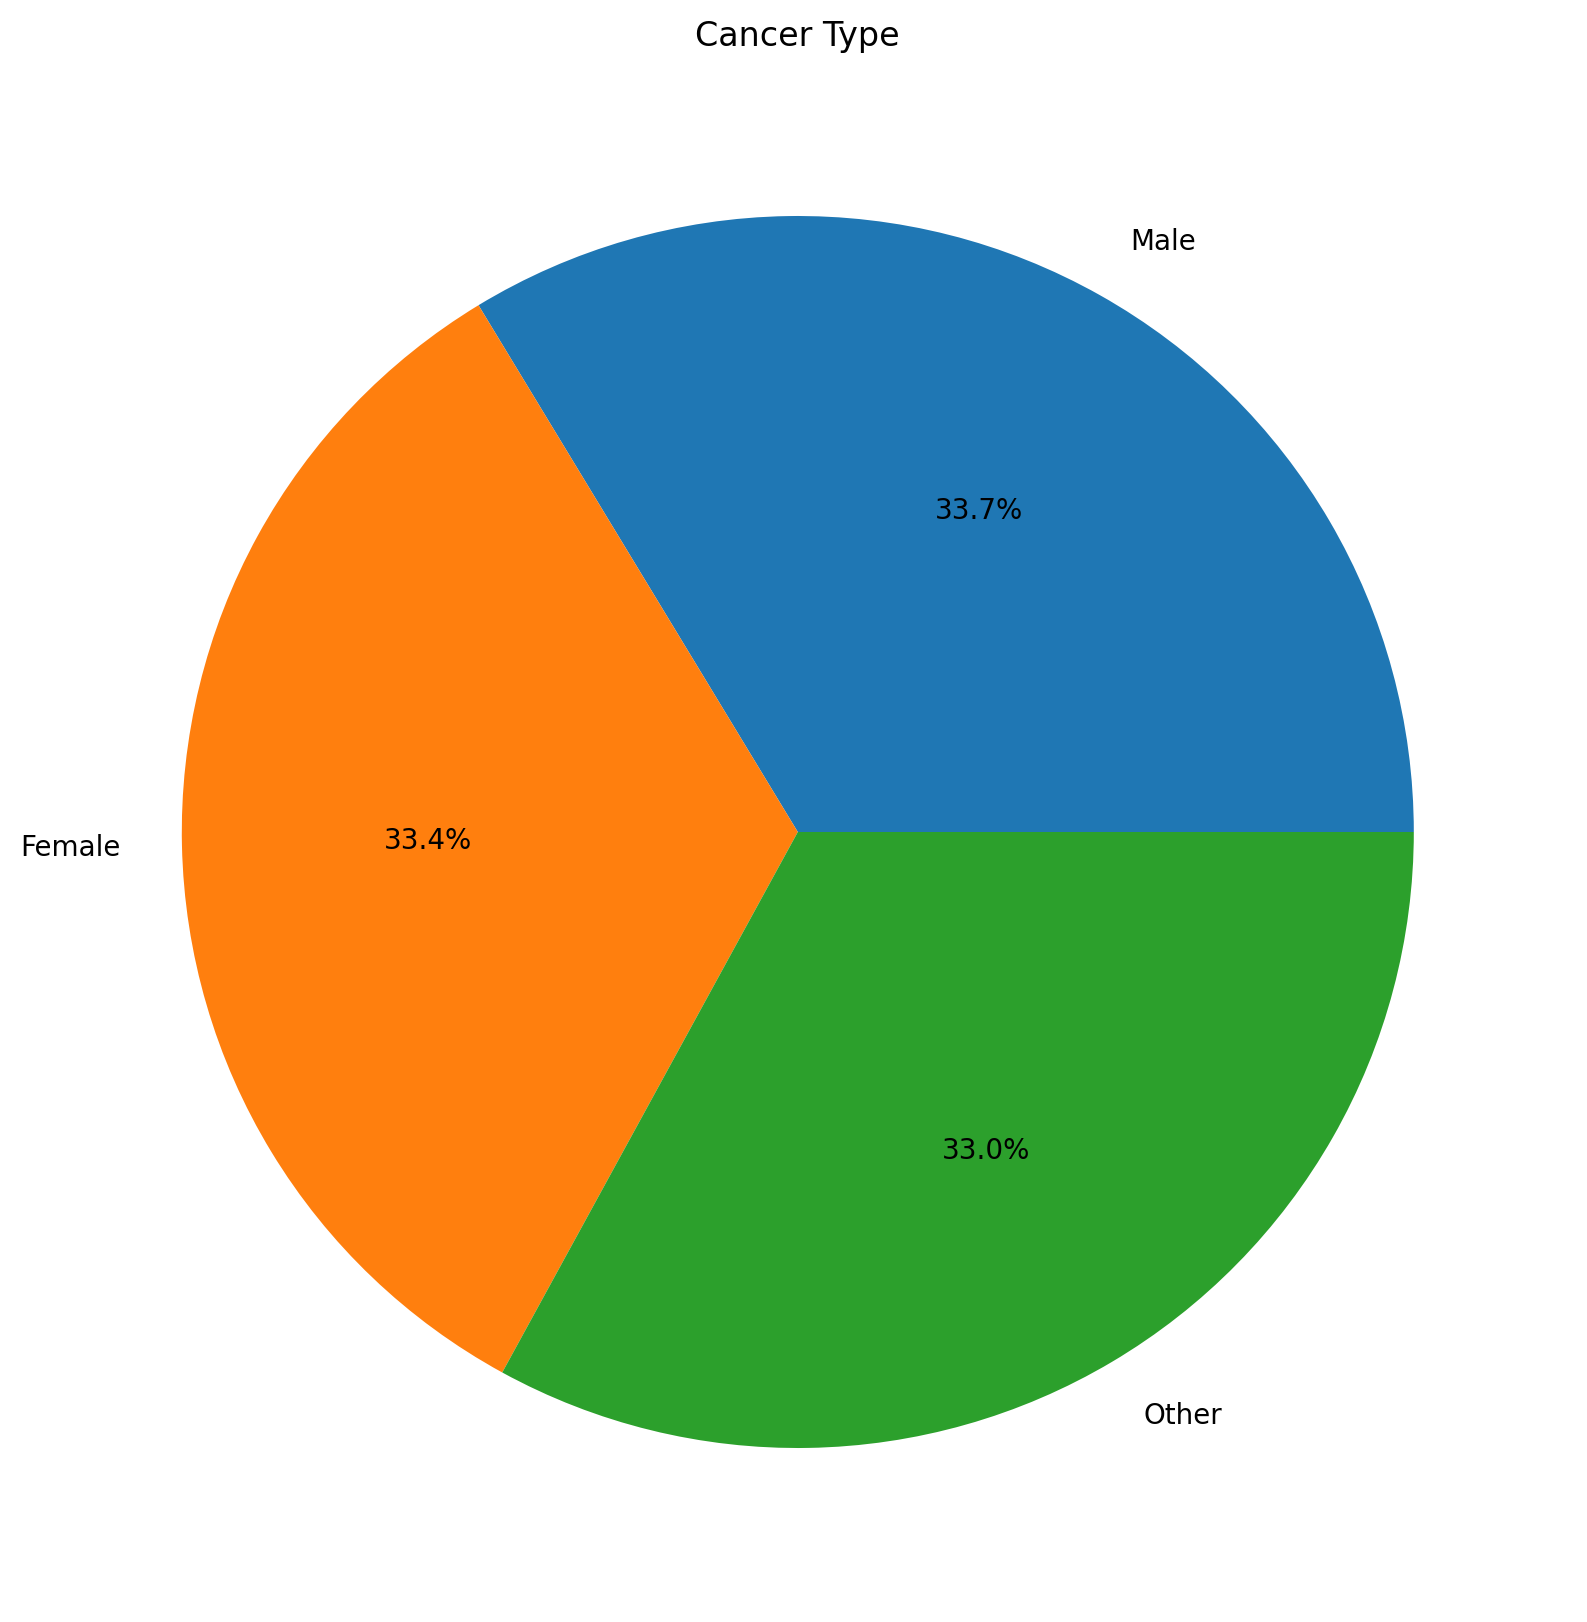

In [24]:
plt.figure(figsize=(10,10))
plt.title('Cancer Type')
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.1f%%')
plt.show()

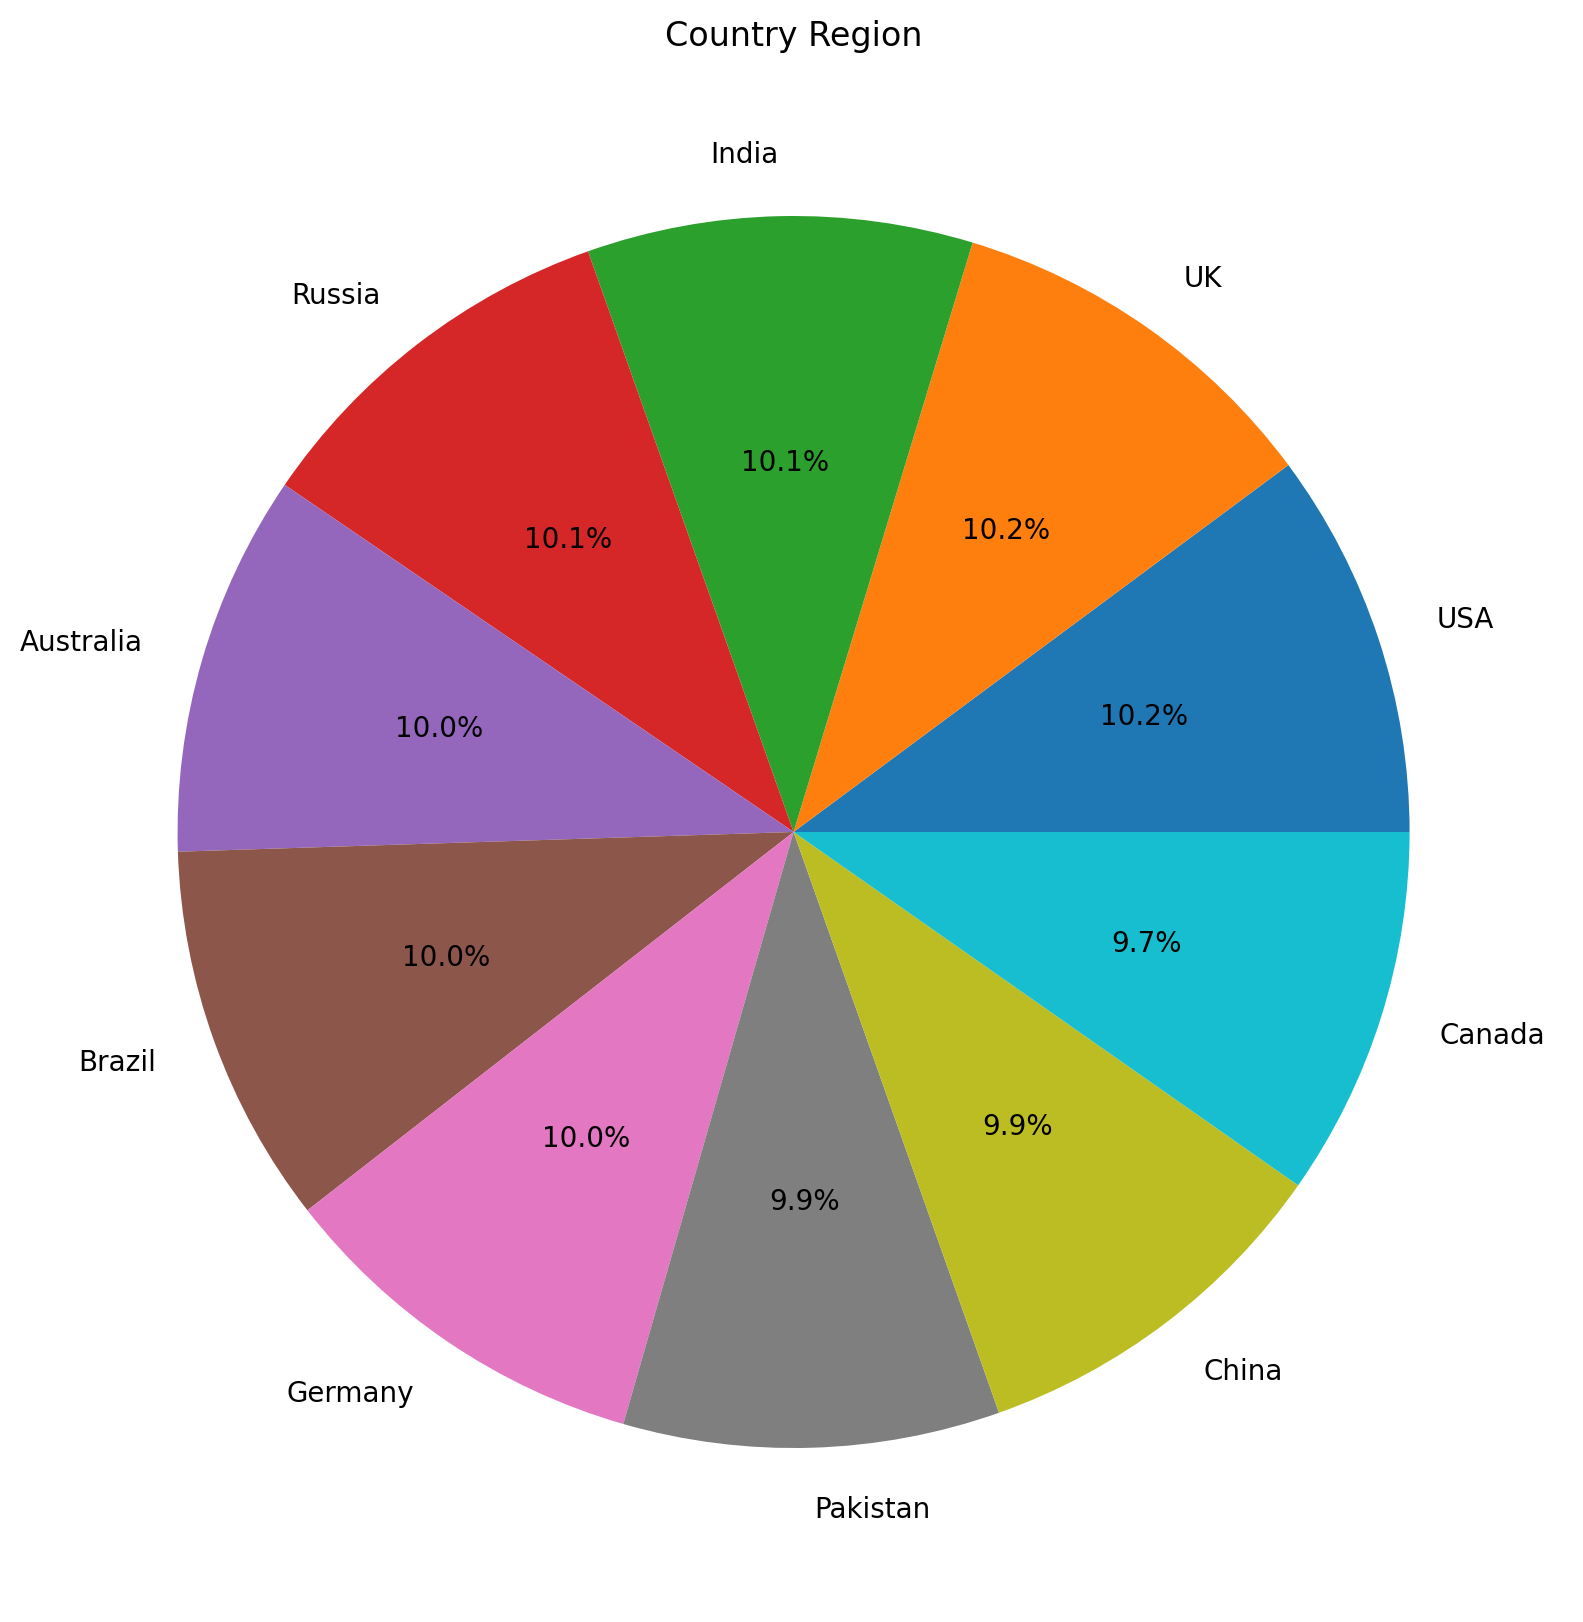

In [25]:
#pie chat for country region
plt.figure(figsize=(10,10))
plt.title('Country Region')
plt.pie(df['Country_Region'].value_counts(),labels=df['Country_Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

### Check for imbalanced Category

In [26]:
df['Gender'].value_counts()

Gender
Male      8270
Female    8194
Other     8096
Name: count, dtype: int64

In [27]:
df['Country_Region'].value_counts()

Country_Region
USA          2494
UK           2493
India        2483
Russia       2470
Australia    2465
Brazil       2460
Germany      2460
Pakistan     2424
China        2423
Canada       2388
Name: count, dtype: int64

In [28]:
df['Cancer_Type'].value_counts()

Cancer_Type
Colon       3134
Prostate    3122
Leukemia    3066
Skin        3064
Liver       3063
Breast      3057
Cervical    3048
Lung        3006
Name: count, dtype: int64

In [29]:
df['Cancer_Stage'].value_counts()

Cancer_Stage
Stage I      4953
Stage II     4945
Stage III    4912
Stage IV     4889
Stage 0      4861
Name: count, dtype: int64

We Notice That There is no Imbanaced Category !!

## Preprocessing for Modeling

### Dataset Overview

In [30]:
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
14540,PT0014540,25,Female,Australia,2015,7.1,8.5,7.8,4.5,2.2,Breast,Stage 0,55659.23,1.600000,5.87
35970,PT0035970,36,Female,Australia,2015,10.0,9.7,8.4,1.1,2.2,Breast,Stage 0,71372.99,8.600000,5.73
12350,PT0012350,49,Female,Australia,2015,9.9,5.3,5.7,9.7,5.3,Breast,Stage I,76981.61,4.986312,6.56
35216,PT0035216,69,Female,Australia,2015,5.6,2.0,9.6,1.2,2.3,Breast,Stage I,57893.61,1.100000,4.17
2416,PT0002416,58,Female,Australia,2015,4.2,4.7,6.5,7.3,8.3,Breast,Stage I,63010.13,5.700000,5.55


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24560 entries, 14540 to 46369
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             24560 non-null  object 
 1   Age                    24560 non-null  int64  
 2   Gender                 24560 non-null  object 
 3   Country_Region         24560 non-null  object 
 4   Year                   24560 non-null  int64  
 5   Genetic_Risk           24560 non-null  float64
 6   Air_Pollution          24560 non-null  float64
 7   Alcohol_Use            24560 non-null  float64
 8   Smoking                24560 non-null  float64
 9   Obesity_Level          24560 non-null  float64
 10  Cancer_Type            24560 non-null  object 
 11  Cancer_Stage           24560 non-null  object 
 12  Treatment_Cost_USD     24560 non-null  float64
 13  Survival_Years         24560 non-null  float64
 14  Target_Severity_Score  24560 non-null  float64
dtypes: 

### Drop Unecessary Columns

In [32]:
df.drop(['Patient_ID'],axis=1,inplace=True)

In [33]:
df.head()

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
14540,25,Female,Australia,2015,7.1,8.5,7.8,4.5,2.2,Breast,Stage 0,55659.23,1.600000,5.87
35970,36,Female,Australia,2015,10.0,9.7,8.4,1.1,2.2,Breast,Stage 0,71372.99,8.600000,5.73
12350,49,Female,Australia,2015,9.9,5.3,5.7,9.7,5.3,Breast,Stage I,76981.61,4.986312,6.56
35216,69,Female,Australia,2015,5.6,2.0,9.6,1.2,2.3,Breast,Stage I,57893.61,1.100000,4.17
2416,58,Female,Australia,2015,4.2,4.7,6.5,7.3,8.3,Breast,Stage I,63010.13,5.700000,5.55


### Categorical Columns

In [34]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage'], dtype='object')


#### Categorical Columns Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

categorical_columns_label = ['Gender', 'Cancer_Stage', 'Year'] # Label encoding
df_categorical = df[categorical_columns_label]

label_encoders = {}
for column in categorical_columns_label:
    le = LabelEncoder()
    df_categorical[column] = le.fit_transform(df_categorical[column])
    label_encoders[column] = le

import joblib
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']

In [36]:
df_categorical.head()

,Gender,Cancer_Stage,Year
14540,0,0,0
35970,0,0,0
12350,0,1,0
35216,0,1,0
2416,0,1,0


In [37]:
categorical_columns_ohe = ['Country_Region', 'Cancer_Type'] # One hot encoding
df_categorical[categorical_columns_ohe] = df[categorical_columns_ohe]

df_categorical = pd.concat([df_categorical[categorical_columns_label], pd.get_dummies(df_categorical[categorical_columns_ohe],prefix_sep='_')], axis=1)

df_categorical.head()

,Gender,Cancer_Stage,Year,Country_Region_Australia,Country_Region_Brazil,Country_Region_Canada,Country_Region_China,Country_Region_Germany,Country_Region_India,Country_Region_Pakistan,Country_Region_Russia,Country_Region_UK,Country_Region_USA,Cancer_Type_Breast,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin
14540,0,0,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
35970,0,0,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
12350,0,1,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
35216,0,1,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2416,0,1,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


### Numerical Columns

In [38]:
df['Year']=df['Year'].astype('object')
Target = df['Target_Severity_Score']
df.drop(['Target_Severity_Score'],axis=1,inplace=True)
numerical_columns = df.select_dtypes(include = np.number).columns
print(numerical_columns)

Index(['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking',
       'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years'],
      dtype='object')


#### Numerical Columns Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_numerical = df[numerical_columns]
df_numerical = scaler.fit_transform(df_numerical)
df_numerical = pd.DataFrame(df_numerical, columns=numerical_columns)
df_numerical

,Age,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years
0,0.072464,0.71,0.85,0.78,0.45,0.22,0.533256,0.160000
1,0.231884,1.00,0.97,0.84,0.11,0.22,0.698664,0.860000
2,0.420290,0.99,0.53,0.57,0.97,0.53,0.757702,0.498631
3,0.710145,0.56,0.20,0.96,0.12,0.23,0.556776,0.110000
4,0.550725,0.42,0.47,0.65,0.73,0.83,0.610634,0.570000
...,...,...,...,...,...,...,...,...
24555,0.695652,0.56,0.61,0.33,0.95,0.74,0.233116,0.230000
24556,0.130435,0.59,0.87,0.96,0.73,0.01,0.370473,0.420000
24557,0.057971,0.53,0.83,0.35,0.63,0.13,0.668914,0.480000
24558,0.144928,0.69,0.09,0.69,0.85,0.08,0.211577,0.460000


In [40]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,24560.0,0.498249,0.293501,0.0,0.246377,0.492754,0.753623,1.0
Genetic_Risk,24560.0,0.500657,0.287129,0.0,0.250000,0.500000,0.750000,1.0
Air_Pollution,24560.0,0.502099,0.288634,0.0,0.250000,0.500000,0.750000,1.0
Alcohol_Use,24560.0,0.503465,0.266377,0.0,0.300000,0.510000,0.710000,1.0
Smoking,24560.0,0.497596,0.280115,0.0,0.260000,0.497688,0.730000,1.0
Obesity_Level,24560.0,0.499344,0.288668,0.0,0.250000,0.500000,0.750000,1.0
Treatment_Cost_USD,24560.0,0.499306,0.287590,0.0,0.248703,0.501079,0.747783,1.0
Survival_Years,24560.0,0.498603,0.280405,0.0,0.260000,0.498631,0.730000,1.0


### Combine Columns

In [41]:
df_numerical.reset_index(drop=True, inplace=True)
df_categorical.reset_index(drop=True, inplace=True)

In [42]:
X = pd.merge(df_numerical, df_categorical.astype(int), left_index=True, right_index=True)
y =Target

In [43]:
#y as classification if < 0.5 then 0 else if > 0.5 then 2 else x =5 then 1

y = y.apply(lambda x: 0 if x <3 else 1 if x < 6 else 2)


In [44]:
y.value_counts()

Target_Severity_Score
1    18496
2     4823
0     1241
Name: count, dtype: int64

### Dimension Reduction

In [45]:
# from sklearn.feature_selection import SelectKBest, chi2

# SelKpest = SelectKBest(chi2, k=15)
# X_new=SelKpest.fit_transform(X,y)
# print("the new shape is : ", X_new.shape)
# print(X.columns[SelKpest.get_support()].to_list())
# X=X_new


In [46]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selFromModel=SelectFromModel(RandomForestClassifier(n_estimators = 50))
X_new=selFromModel.fit_transform(X,y)
print("the new shape is : ", X_new.shape)
print(X.columns[selFromModel.get_support()].to_list())
X=X_new


the new shape is :  (24560, 8)
['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years']


In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


lda = LDA(n_components=min(X.shape[1], len(np.unique(y)) - 1)) 
X_lda = lda.fit_transform(X, y)



In [48]:
print("Explained variance ratio: ", np.cumsum(lda.explained_variance_ratio_))

Explained variance ratio:  [0.99968419 1.        ]


### Train_Test Split Dataset

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

## Machine Learning Model

### SVC with Multilabel Target

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier

param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__kernel': ['linear', 'rbf']
}

ovr_svc = OneVsRestClassifier(SVC())

grid_search = GridSearchCV(ovr_svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

cv_scores = cross_val_score(grid_search.best_estimator_, X_test, y_test, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Scores on Test Set:", cv_scores)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'estimator__C': 1, 'estimator__kernel': 'rbf'}
Best Score: 0.9705676647144168
Cross-Validation Scores on Test Set: [0.96540027 0.9687924  0.96675712 0.96673456 0.96537678]


### Model Save

In [51]:
import pickle
pickle.dump(grid_search.best_estimator_, open('model_SVC.pkl', 'wb'))

### Model Evaluation

In [52]:
#predict 

y_pred = pd.DataFrame(grid_search.best_estimator_.predict(X_test), columns=['Target_Severity_Score'])
y_pred.head()

,Target_Severity_Score
0,1
1,1
2,1
3,2
4,1


              precision    recall  f1-score   support

           0     0.9502    0.8543    0.8997       357
           1     0.9720    0.9862    0.9790      5587
           2     0.9557    0.9249    0.9400      1424

    accuracy                         0.9680      7368
   macro avg     0.9593    0.9218    0.9396      7368
weighted avg     0.9678    0.9680    0.9677      7368



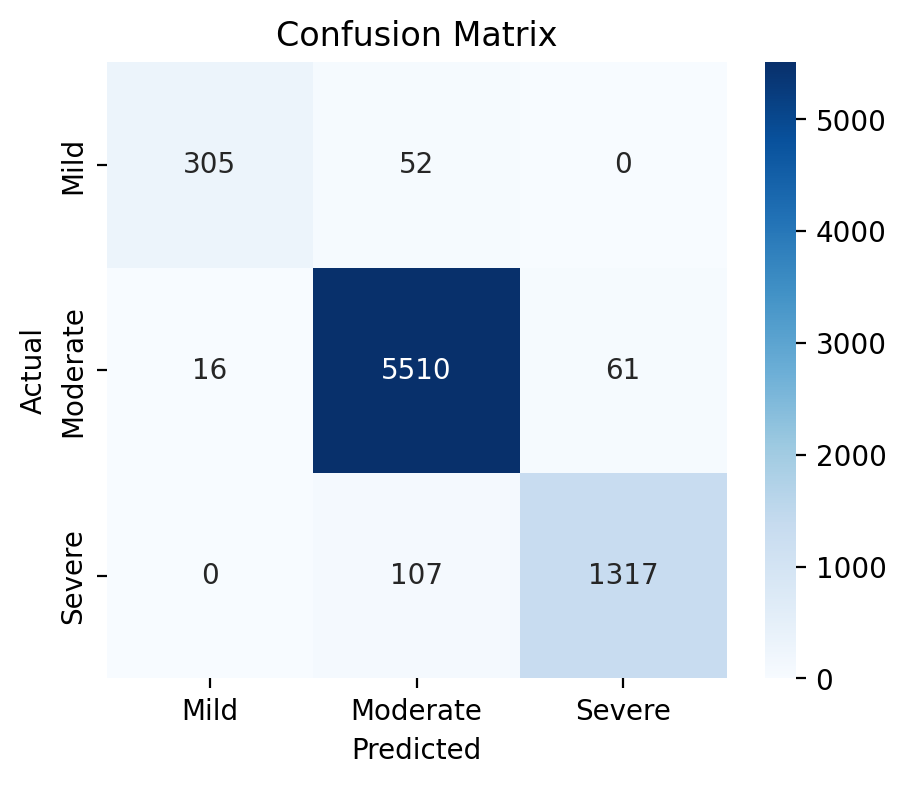

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
			xticklabels=['Mild', 'Moderate', 'Severe'], yticklabels=['Mild', 'Moderate', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### What is the Predictions Say ?

0 that indicates low severity (Mild)


1 that indicates medium severity (Moderate)


2 that indicates high severity (Severe)

In [54]:
y_pred['Target_Severity_Score'] = y_pred['Target_Severity_Score'].map({0: 'Mild', 1: 'Moderate', 2: 'Severe'})
y_pred.head()

,Target_Severity_Score
0,Moderate
1,Moderate
2,Moderate
3,Severe
4,Moderate


#### Save Output

In [55]:
#save to csv
y_pred.to_csv('output.csv', index=False)

# DNN

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
from sklearn.preprocessing import OneHotEncoder

y_array = y.to_numpy().reshape(-1, 1)

# ohe to the y
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y_array)



In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_encoded, test_size=0.3, random_state=42)

In [72]:
KerasModel = keras.models.Sequential([
    keras.layers.Dense(32, activation='tanh', input_shape=(2,)),
    keras.layers.Dense(16, activation='tanh'),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(y_encoded.shape[1], activation='softmax')
])

In [73]:
KerasModel.compile(optimizer='AdamW', loss='categorical_crossentropy', metrics=['accuracy'])


In [91]:
history = KerasModel.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=500,
    verbose=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        patience=10,
        monitor='val_accuracy',
        restore_best_weights=True
    )]
)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9724 - loss: 0.1085 - val_accuracy: 0.9659 - val_loss: 0.1285
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9713 - loss: 0.1154 - val_accuracy: 0.9647 - val_loss: 0.1293
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9706 - loss: 0.1182 - val_accuracy: 0.9684 - val_loss: 0.1275
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9721 - loss: 0.1126 - val_accuracy: 0.9667 - val_loss: 0.1279
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9701 - loss: 0.1169 - val_accuracy: 0.9669 - val_loss: 0.1278
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9718 - loss: 0.1128 - val_accuracy: 0.9686 - val_loss: 0.1269
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9727 - loss: 0.1099 - val_accuracy: 0.9666 - val_loss: 0.1267
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9709 - loss: 0.1188 - val_accuracy: 0.9688 - v

In [92]:
print(KerasModel.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,363 (9.23 KB)

 Trainable params: 787 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,576 (6.16 KB)

None


In [93]:
KerasModel.save('KerasModel.keras')


In [94]:
NewKerasModel = keras.models.load_model('KerasModel.keras')

In [95]:
y_pred = NewKerasModel.predict(X_test)


231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step


In [96]:
ModelLoss, ModelAccuracy = NewKerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9692 - loss: 0.1308
Model Loss is 0.12624385952949524
Model Accuracy is 0.9687839150428772


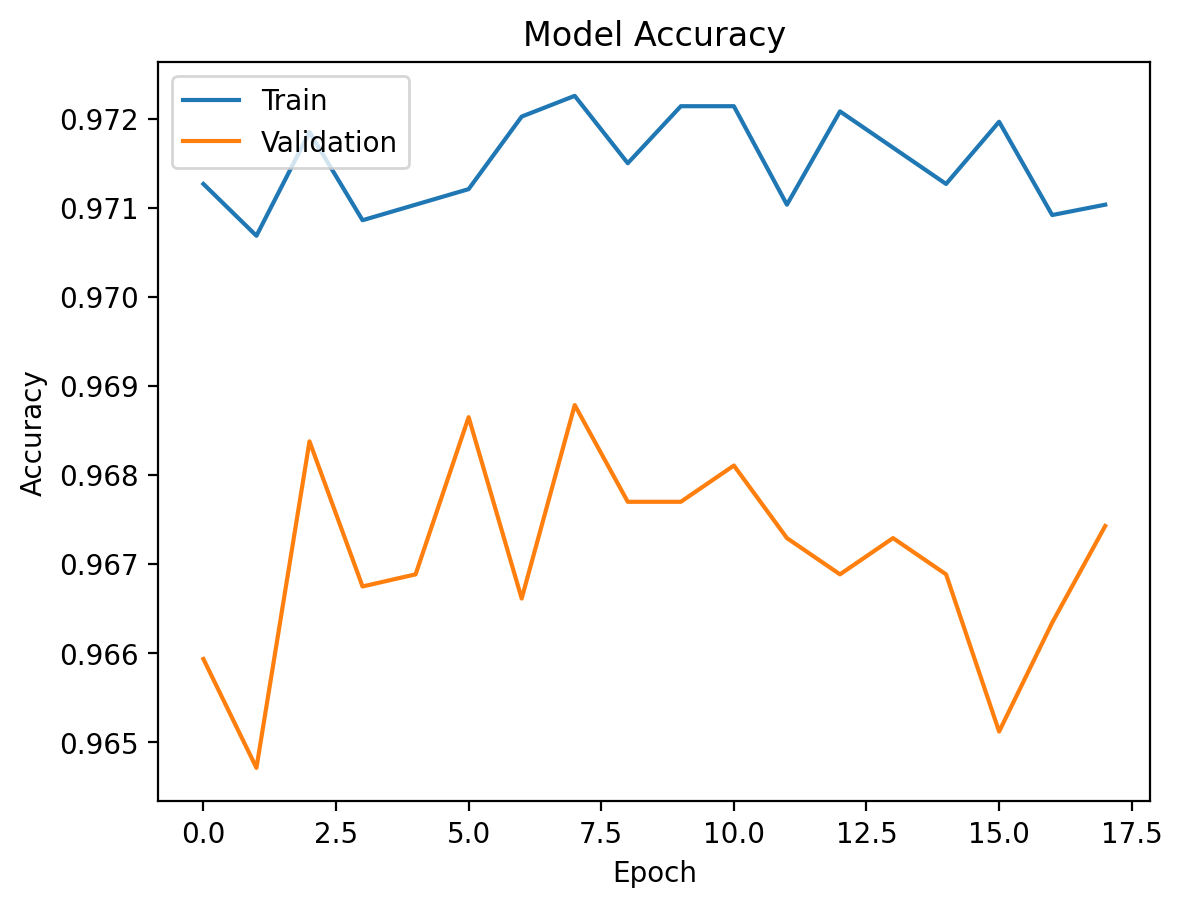

In [97]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

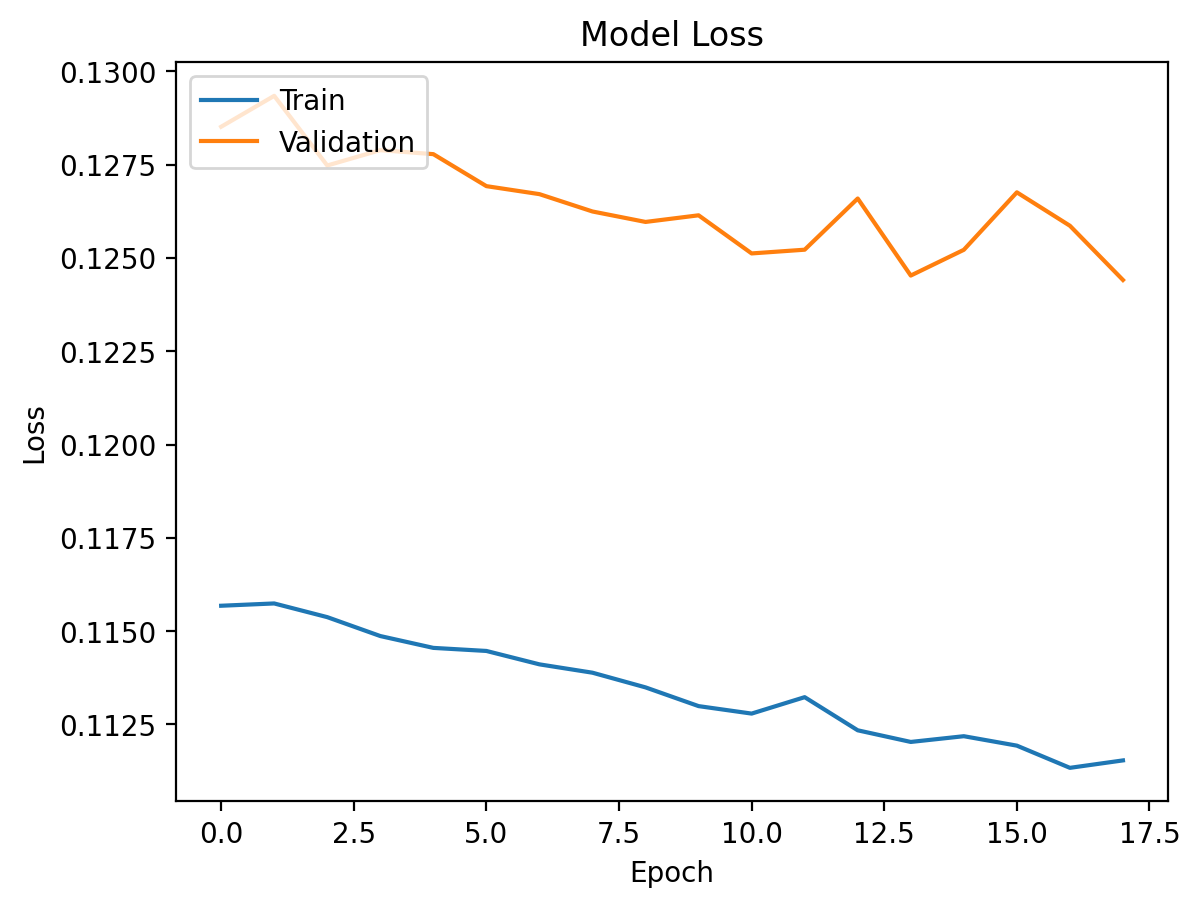

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [99]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
CM = confusion_matrix(y_true_classes, y_pred_classes)

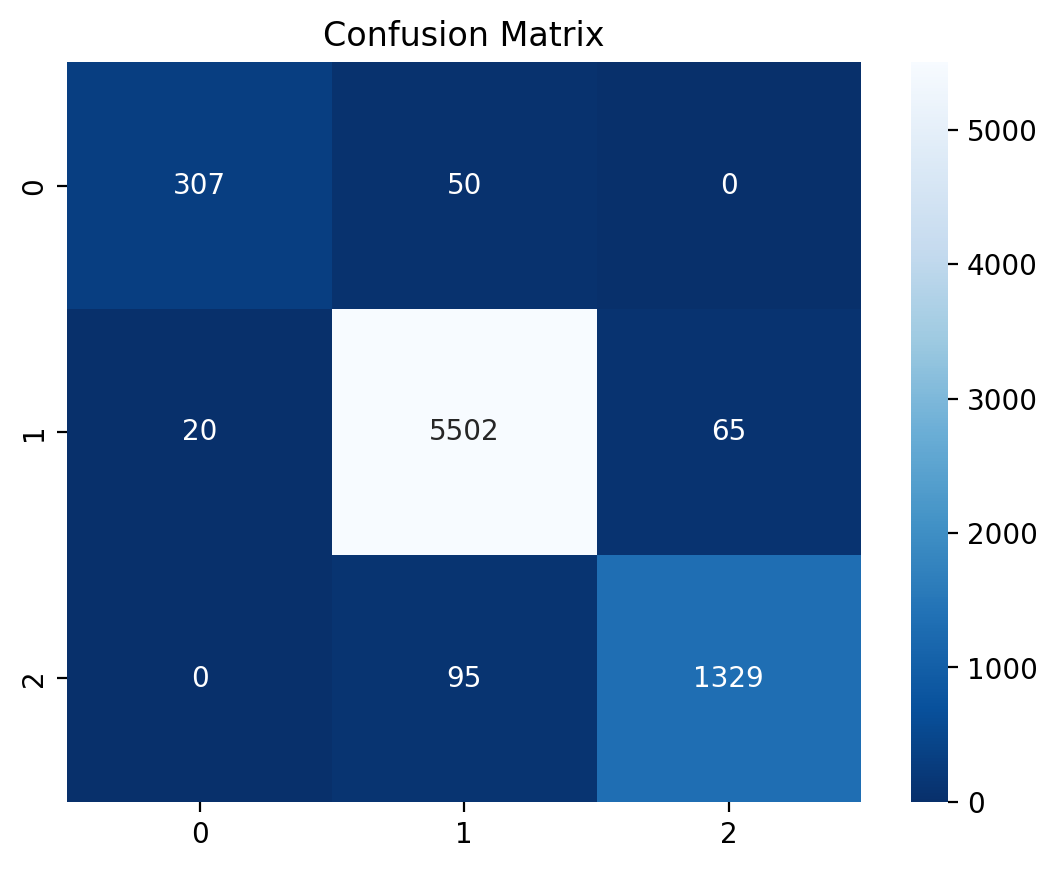

In [100]:
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues_r', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.title('Confusion Matrix')
plt.show()

In [101]:
y_true_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

class_names = encoder.categories_[0].astype(str)

ClassificationReport = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print('Classification Report:\n', ClassificationReport)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       357
           1       0.97      0.98      0.98      5587
           2       0.95      0.93      0.94      1424

    accuracy                           0.97      7368
   macro avg       0.96      0.93      0.94      7368
weighted avg       0.97      0.97      0.97      7368

